Level 2: Operational Features & Feature Engineering

Task 1: Percentage of Restaurants Offering Table Booking & Online Delivery

In [ ]:
# Percentage of Restaurants offering Table Booking
table_booking_pct = df['Has Table booking'].value_counts(normalize=True) * 100
print("Table Booking Percentage:\n", table_booking_pct)

table_booking_pct.to_excel('Table_Booking_Percentage.xlsx')

# Percentage of Restaurants offering Online Delivery
online_delivery_pct = df['Has Online delivery'].value_counts(normalize=True) * 100
print("Online Delivery Percentage:\n", online_delivery_pct)

online_delivery_pct.to_excel('Online_Delivery_Percentage.xlsx')


Table Booking Percentage:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64
Online Delivery Percentage:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


Compare Ratings: With vs Without Table Booking

Rating Comparison:
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


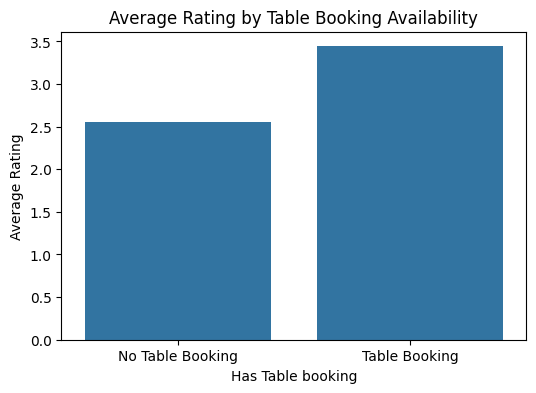

In [ ]:
# Group by table booking
table_rating = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("Rating Comparison:\n", table_rating)

table_rating.to_excel('table_rating.xlsx')

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=table_rating.index, y=table_rating.values)
plt.xticks([0, 1], ['No Table Booking', 'Table Booking'])
plt.ylabel('Average Rating')
plt.title('Average Rating by Table Booking Availability')
plt.savefig('Average_Rating_by_Table_Booking.png')
plt.show()


Rating Comparison:
 Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


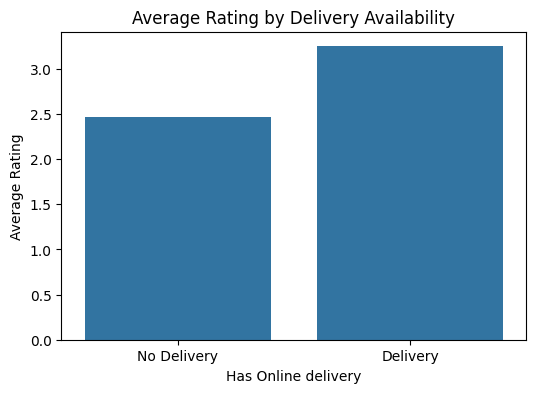

In [ ]:
# Compare ratings
delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("Rating Comparison:\n", delivery_rating)

delivery_rating.to_excel('Rating_Comparison.xlsx')

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=delivery_rating.index, y=delivery_rating.values)
plt.xticks([0, 1], ['No Delivery', 'Delivery'])
plt.ylabel('Average Rating')
plt.title('Average Rating by Delivery Availability')
plt.savefig('Average_Rating_by_Delivery.png')
plt.show()

Online Delivery Availability by Price Range

Delivery Availability by Price Range:
 Price range
1    0.157741
2    0.413106
3    0.291903
4    0.090444
Name: Delivery, dtype: float64


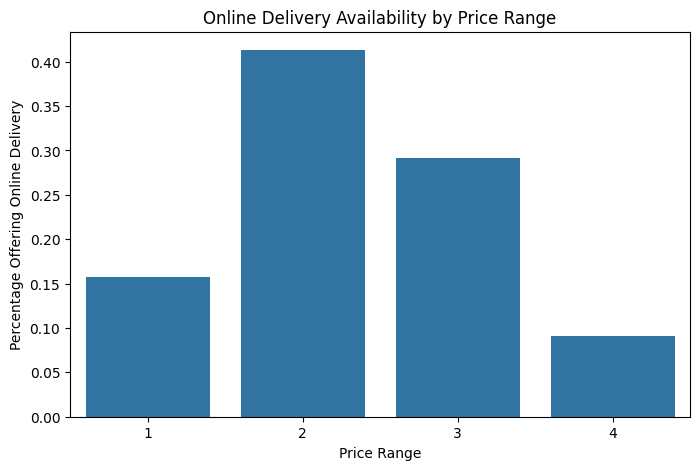

In [ ]:
# Map 'Yes'/'No' to 1/0 without creating a new column
df['Delivery'] = df['Has Online delivery'].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Group by 'Price range' and calculate the mean
delivery_by_price = df.groupby('Price range')['Delivery'].mean()

# Display the result
print("Delivery Availability by Price Range:\n", delivery_by_price)

# Save to Excel
delivery_by_price.to_excel('Delivery_Availability_by_Price_Range.xlsx')

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=delivery_by_price.index, y=delivery_by_price.values)
plt.xlabel('Price Range')
plt.ylabel('Percentage Offering Online Delivery')
plt.title('Online Delivery Availability by Price Range')
plt.savefig('Online_Delivery_Availability_by_Price_Range.png')
plt.show()


Task 2: Price Range Analysis

Most Common Price Range

In [ ]:
# Count frequency of each price range
price_counts = df['Price range'].value_counts().sort_index()
most_common_price = price_counts.idxmax()
print(f"Most Common Price Range: {most_common_price}")


Most Common Price Range: 1


Average Rating per Price Range

In [ ]:
# Group by price range
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average Rating by Price Range:\n", avg_rating_by_price)

# Save to Excel
avg_rating_by_price.to_excel('Average_Rating_by_Price_Range.xlsx')


Average Rating by Price Range:
 Price range
4    3.817918
3    3.683381
2    2.941054
1    1.999887
Name: Aggregate rating, dtype: float64


Identify Rating Color with Highest Average Rating

In [ ]:
# Rating color with highest avg rating
color_rating = df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)
print("Rating Color with Highest Average Rating:\n", color_rating)

# Save to Excel
color_rating.to_excel('Rating_Color_with_Highest_Average_Rating.xlsx')

color_avg_rating = df.groupby('Rating color')['Aggregate rating'].mean().reset_index()
top_color = color_avg_rating.loc[color_avg_rating['Aggregate rating'].idxmax(), 'Rating color']
print(f"Rating Color with Highest Average Rating: {top_color}")


Rating Color with Highest Average Rating:
 Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64
Rating Color with Highest Average Rating: Dark Green


Visualize Ratings by Price Range

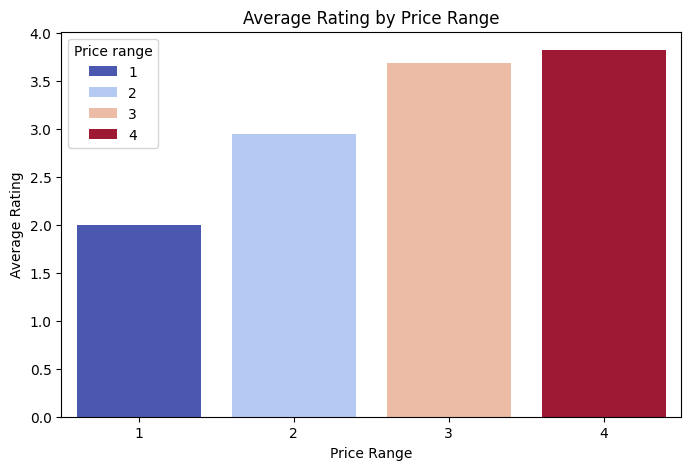

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, hue=avg_rating_by_price.index, palette='coolwarm')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.savefig('Average_Rating_by_Price_Range.png')
plt.show()


Task 3: Feature Engineering

Extract Additional Features

In [ ]:
# Length of restaurant Name and Address
df['Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

# preview
print(df[['Restaurant Name', 'Name Length', 'Address', 'Address Length']].head())

          Restaurant Name  Name Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


Encode Categorical Flags

In [ ]:
# Encode 'Has Table booking' and 'Has Online delivery'
# Strip whitespace and lowercase for consistency
df['Table Booking Flag'] = df['Has Table booking'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['Delivery Flag'] = df['Has Online delivery'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['Rating category'] = df['Rating color'].astype('category').cat.codes
df['Cuisines category'] = df['Cuisines'].astype('category').cat.codes

# Preview
print(df[['Has Table booking', 'Table Booking Flag', 'Has Online delivery', 'Delivery Flag']].head())

# Preview
print(df[['Rating color','Rating category', 'Cuisines', 'Cuisines category']].head())


  Has Table booking  Table Booking Flag Has Online delivery  Delivery Flag
0               Yes                   1                  No              0
1               Yes                   1                  No              0
2               Yes                   1                  No              0
3                No                   0                  No              0
4               Yes                   1                  No              0
  Rating color  Rating category                          Cuisines  \
0   Dark Green                0        French, Japanese, Desserts   
1   Dark Green                0                          Japanese   
2        Green                1  Seafood, Asian, Filipino, Indian   
3   Dark Green                0                   Japanese, Sushi   
4   Dark Green                0                  Japanese, Korean   

   Cuisines category  
0                920  
1               1111  
2               1671  
3               1126  
4               1122

Visualize Feature Distributions

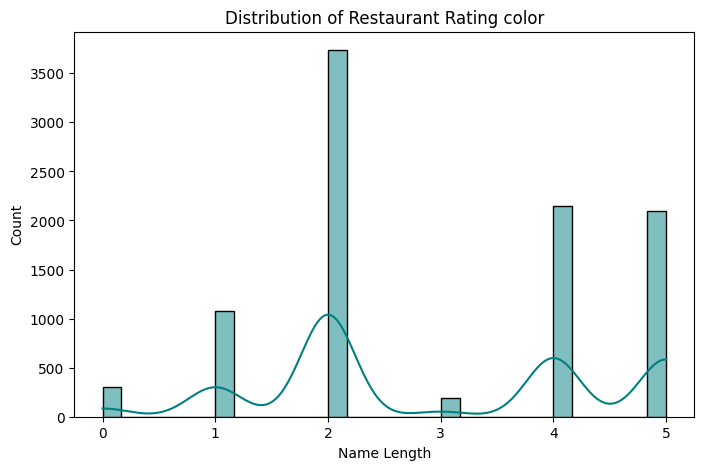

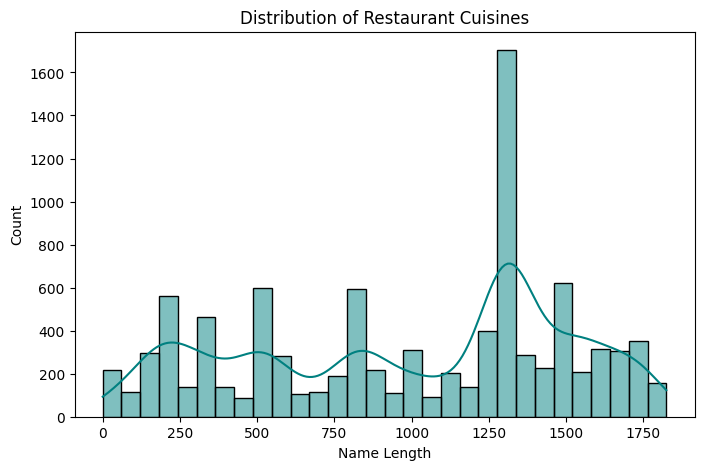

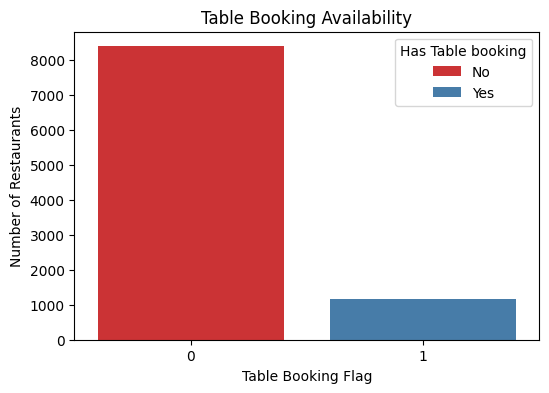

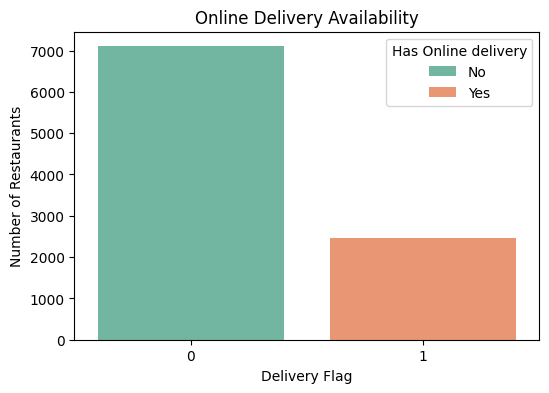

In [ ]:
# Rating category distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Rating category'], bins=30, kde=True, color='teal')
plt.title('Distribution of Restaurant Rating color')
plt.xlabel('Name Length')
plt.ylabel('Count')
plt.savefig('Rating_Category_Distribution.png')
plt.show()

# Cuisines category distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Cuisines category'], bins=30, kde=True, color='teal')
plt.title('Distribution of Restaurant Cuisines')
plt.xlabel('Name Length')
plt.ylabel('Count')
plt.savefig('Cuisines_Category_Distribution.png')
plt.show()

# Table booking vs online delivery
plt.figure(figsize=(6,4))
sns.countplot(x='Table Booking Flag', hue='Has Table booking', data=df, palette='Set1')
plt.title('Table Booking Availability')
plt.ylabel('Number of Restaurants')
plt.savefig('Table_Booking_Availability.png')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Delivery Flag', hue='Has Online delivery', data=df, palette='Set2')
plt.title('Online Delivery Availability')
plt.ylabel('Number of Restaurants')
plt.savefig('Online_Delivery_Availability.png')
plt.show()
